In [ ]:
def preprocess_single_image(image_path):
    """
    Carga y preprocesa una sola imagen para pasarla por el modelo.
    """
    # Definir las transformaciones necesarias
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),  # Convertir a escala de grises
        transforms.Resize((224, 224)),               # Redimensionar a 224x224
        transforms.ToTensor(),                       # Convertir a tensor
        transforms.Normalize((0.5,), (0.5,))         # Normalizar (ajusta según el entrenamiento)
    ])

    # Cargar la imagen
    image = Image.open(image_path)
    
    # Aplicar transformaciones
    image = transform(image)
    
    # Agregar una dimensión para el batch
    image = image.unsqueeze(0)
    
    return image


In [ ]:
def predict_single_image(model, image_tensor, label_mapping):
    """
    Realiza una predicción para una sola imagen.
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    with torch.no_grad():
        # Pasar la imagen por el modelo
        image_tensor = image_tensor.to(device)
        output = model(image_tensor)
        
        # Obtener la predicción
        _, predicted = torch.max(output, 1)
        predicted_label = predicted.item()
        
        # Mapear el índice a la etiqueta correspondiente
        label_name = list(label_mapping.keys())[list(label_mapping.values()).index(predicted_label)]
        
    return label_name


In [ ]:
# Ruta de la imagen de prueba


test_image_path = "hand.jpg"  # Reemplaza con la ruta de tu imagen

# Cargar y preprocesar la imagen
image_tensor = preprocess_single_image(test_image_path)

# Realizar la predicción
predicted_label = predict_single_image(model, image_tensor, label_mapping)
print(f"Predicción para la imagen: {predicted_label}")


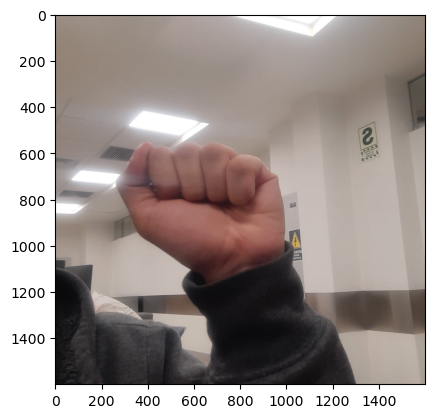

In [ ]:

# Cargar y preprocesar la imagen

import skimage.io
import matplotlib.pyplot as plt

image = skimage.io.imread(test_image_path)

plt.imshow(image)